# <center>HW3</center> #
####  107061112 王昊文
***
## <u>Question 1</u>
For the wine dataset (https://archive.ics.uci.edu/ml/datasets/Wine), please train a
model with the algorithms you have learned now with scikit-learn to classify three kinds
of wine. The number of features to train the model is open in this question.
Please provide enough information for the model development and testing. For example:

1. Preprocessing of dataset (# of features used in the model, dataset partitioning, feature
scaling, ...)
2. Why you choose the algorithm to develop the model? How do you select the parameters
3. Performance of the model you developed.
4. ...


### Implementation
1. 利用Pandas讀取資料，將資做好標準化處理，並利用Sklearn的Library將資料分成Test set and Training Set。在這裡我先不使用Validation Set，我們只需要先Train出一個合理Model而已。
2. 我會將上課教過得模型，包括Decision Tree, Random Forest, Perceptron, Logistic Regression, SVM, KNN去一一實做，最後去分析彼此的表現。最後去挑選表現最佳得來當作我選擇的模型。
3. 由於資料Feature比較多很難直接去看說哪些比較重要。因此我們要透過Random Forest, Logisic Regression,在Random Forest中用ensemble去探討最好的Feature，然後Logistic Regression中利用內建的Library以及L1 regularization中將Penalty拉到很大時浮出來的Feature。在所有不同演算法中，我會分別使用全部的Feature跟某些特定的Feature去分析他們準確率是否差不多，進而去研判我們所挑選的Feature對不對。如果挑選比較少的Feature可以達到一樣的準確率，那我們就成功減少了我們Model的複雜度，也就象徵我們選擇Feature的方法是正確的。
4. 利用Random Search來挑選Hyperparameter。
4. 透過Tuning hyperparameter，去分析不同Hyperparameter讓Model變化的趨勢，除了討論Overfitting，我們也會去透過準確率變化趨勢去分析這個Model適不適合。


## Read in the dataset using pandas

In [29]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
 'OD280/OD315 of diluted wines', 'Proline']

df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Split X and y

In [2]:
# first extract the labels
y = df_wine['Class label'].values
# extract the features and standardize
X = df_wine.drop(columns = ['Class label']).values
print('Class Labels:', np.unique(y))

Class Labels: [1 2 3]


## Seperating test and Training Datasets
Using the library from sklearn

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
# Count numbers for each class. We want to exclude the "0" class since the class starts at 1, so we subtract y by 1
print('Labels counts in y:', np.bincount(y - 1))
print('Labels counts in y_Train:', np.bincount(y_train - 1))
print('Labels counts in y_test:', np.bincount(y_test - 1))

Labels counts in y: [59 71 48]
Labels counts in y_Train: [41 50 33]
Labels counts in y_test: [18 21 15]


## Standardization

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print('X_train mean = %.3f' %np.mean(X_train_std), ", deviation = %.3f" % np.std(X_train_std))
print('X_test mean = %.3f' %np.mean(X_test_std), ", deviation = %.3f" % np.std(X_test_std))

X_train mean = 0.000 , deviation = 1.000
X_test mean = -0.022 , deviation = 0.994


## Feature Selection
在這裡我們使用sklearn內建的Feature importance還有SelectFromModel功能來尋找最適合Feature。其中我會使用LogisticRegression以及Random forest來當作我們底層的Classifier，來進行綜合評估。

### Random Forest

 1) Proline                        0.179927
 2) Color intensity                0.153158
 3) Flavanoids                     0.146123
 4) Alcohol                        0.138224
 5) OD280/OD315 of diluted wines   0.114818
 6) Hue                            0.077525
 7) Total phenols                  0.058236
 8) Malic acid                     0.030856
 9) Alcalinity of ash              0.030000
10) Proanthocyanins                0.025713
11) Magnesium                      0.025135
12) Nonflavanoid phenols           0.011548
13) Ash                            0.008738


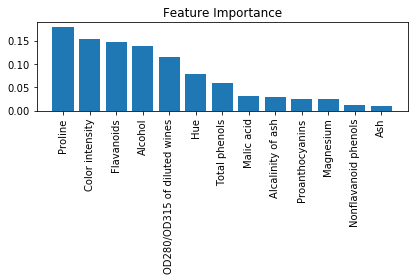

In [5]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' %(f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### LogisticRegression
Use the SelectFromModel method

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
lsvc = LogisticRegression(penalty='l1', C=0.05, solver='liblinear', multi_class='ovr', random_state=0).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print("The most important features are:")
print(feat_labels[model.get_support() == True])

The most important features are:
Index(['Alcalinity of ash', 'Magnesium', 'Flavanoids', 'Color intensity',
       'Proline'],
      dtype='object')


Plot the weights change as penalty goes up under L1

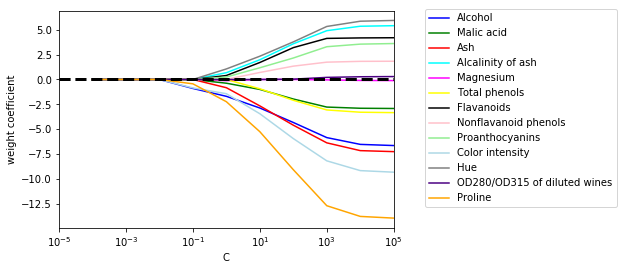

In [7]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c) 
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

綜合比較完之後，我們使用以下四個最重的Feature

1. Proline
2. Color Intensity
3. Alcohol
4. Flavanoids

## Extract important features

1. Proline
2. Color Intensity
3. Alcohol
4. Flavanoids

In [8]:
# X but dimension reduced(simplified)
X_sim = df_wine.loc[:, ['Color intensity', 'Flavanoids', 'Proline', 'Alcohol']].values
X_train_sim, X_test_sim, y_train, y_test = train_test_split(X_sim, y, test_size = 0.3, random_state = 1, stratify = y)
# Count numbers for each class. We want to exclude the "0" class since the class starts at 1, so we subtract y by 1
print('Labels counts in y:', np.bincount(y - 1))
print('Labels counts in y_Train:', np.bincount(y_train - 1))
print('Labels counts in y_test:', np.bincount(y_test - 1))

Labels counts in y: [59 71 48]
Labels counts in y_Train: [41 50 33]
Labels counts in y_test: [18 21 15]


In [9]:
# 標準化
sc = StandardScaler()
sc.fit(X_train_sim)
X_train_sim_std = sc.transform(X_train_sim)
X_test_sim_std = sc.transform(X_test_sim)
print('X_train_sim mean = %.3f' %np.mean(X_train_sim_std), ", deviation = %.3f" % np.std(X_train_sim_std))
print('X_test_sim mean = %.3f' %np.mean(X_test_sim_std), ", deviation = %.3f" % np.std(X_test_sim_std))

X_train_sim mean = 0.000 , deviation = 1.000
X_test_sim mean = 0.067 , deviation = 0.963


## Trying the Decision Tree Algorithm
The decision tree algorithm does not require standardization
Using Random Search to give the best depth for our decision tree. Note that we want our tree to be shallow but achieves high accuraacy rate.

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Store the results
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]
results = {}    # the results of all models are stored here
best_val = -1   # The highest validation accuracy that we have seen so far.
best_clf = None     # The best decision tree model
best_depth = -1   # Best depth for the decision tree, we want it to be shallow to prevent overfitting 
# Finding the best hyperparameter for our logistic model
for md in max_depth:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=md, random_state=1)
    clf.fit(X_train_sim, y_train)  # No need to standardize
    y_pred = clf.predict(X_test_sim)
    val_accuracy = np.mean(y_test == y_pred)
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_clf = clf
        best_depth = md
    results[(md)] = val_accuracy
for dep in sorted(results):
    val_accuracy = results[(dep)]
    print('depth %d val accuracy: %f' % (dep, val_accuracy))
print('Best validation accuracy achieved during cross-validation: %f' % best_val)
print('Depth used: %d' % best_depth)

depth 1 val accuracy: 0.611111
depth 2 val accuracy: 0.888889
depth 3 val accuracy: 0.944444
depth 4 val accuracy: 0.944444
depth 5 val accuracy: 0.944444
depth 6 val accuracy: 0.944444
depth 7 val accuracy: 0.944444
depth 8 val accuracy: 0.944444
depth 9 val accuracy: 0.944444
depth 10 val accuracy: 0.944444
depth 20 val accuracy: 0.944444
Best validation accuracy achieved during cross-validation: 0.944444
Depth used: 3


## Calculate Our Accuracy with the best model we obtained
Also we will draw the decision tree

The results of our best model
Missclassified examples: 3
Accuracy: 0.944


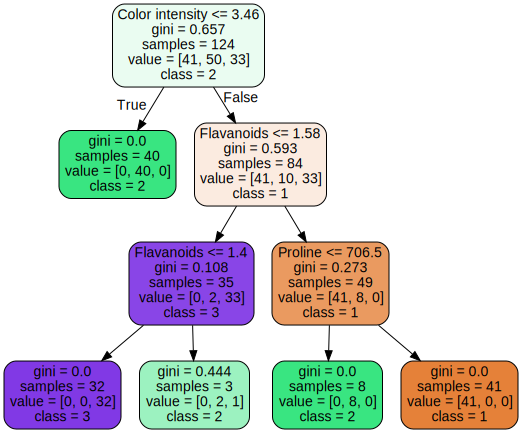

In [11]:
import graphviz
from sklearn.metrics import accuracy_score

# class names
cs = ['1', '2', '3']
# feature names
fn = ['Color intensity', 'Flavanoids', 'Proline', 'Alcohol']

# Use the best decision tree model from above
y_pred = best_clf.predict(X_test_sim)

print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

dot_data = tree.export_graphviz(best_clf, filled=True, rounded=True, class_names=cs, feature_names=fn, out_file=None)

graph = graphviz.Source(dot_data)
graph

## Try Random Forest Algorithm
理論上Random Forest應該要比Decision Tree的效能更好，因為Random Forest是Decision Tree的Model Ensemble，我們測看看是不是這樣。在這裡我們不用考慮Feature Selection，透過Random Forest去平均掉不好的Feature。

當我們使用Random Forest的時候，我們需要考慮我們的N_estimators的參數，也就是我們需要多少棵數來做，理論上越多越好，可以平均掉雜訊，但越大越吃資源，因此我們選擇一個合理得數70。另外我們的$d = \sqrt{m}$這件事，系統預設就是取根號了，因此我們不需要去調整。

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=70, random_state=1, n_jobs=3)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

The results of our best model
Missclassified examples: 0
Accuracy: 1.000


在利用Random Forest，我們發現了Random Forest在我們Test set上達到了$100$的準確率，也符合我們對他的期望。

## Try Perceptron
回歸使用weight update的Model，我們嘗試看看他們準確率如何。Decision Tree系列的不需要將資料標準化，而以下的模型通通須要，因此我也會使用標準化過後的資料去做Training.

In [13]:
from sklearn.linear_model import Perceptron

# Store the results
learning_rates = [0.1, 0.01, 0.12, 0.05, 0.03, 0.11, 0.15, 0.111, 0.2, 0.5, 0.7, 0.008, 1, 2, 0.003, 0.09]
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_ppn = None
best_lr = -1
for lr in learning_rates:
    ppn = Perceptron(eta0=lr, random_state=1)
    ppn.fit(X_train_std, y_train)
    y_pred = ppn.predict(X_test_std)
    val_accuracy = np.mean(y_test == y_pred)
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_ppn = ppn
        best_lr = lr
    results[(lr)] = val_accuracy
for lr in sorted(results):
    val_accuracy = results[(lr)]
    print('lr %e val accuracy: %f' % (lr, val_accuracy))
print('best accuracy achieved during cross-validation: %f' % best_val)
print('The best learning rate for our model is %.3f' %best_lr)

lr 3.000000e-03 val accuracy: 0.962963
lr 8.000000e-03 val accuracy: 0.962963
lr 1.000000e-02 val accuracy: 0.962963
lr 3.000000e-02 val accuracy: 0.962963
lr 5.000000e-02 val accuracy: 0.962963
lr 9.000000e-02 val accuracy: 0.962963
lr 1.000000e-01 val accuracy: 0.962963
lr 1.100000e-01 val accuracy: 0.962963
lr 1.110000e-01 val accuracy: 0.962963
lr 1.200000e-01 val accuracy: 0.962963
lr 1.500000e-01 val accuracy: 0.962963
lr 2.000000e-01 val accuracy: 0.962963
lr 5.000000e-01 val accuracy: 0.962963
lr 7.000000e-01 val accuracy: 0.962963
lr 1.000000e+00 val accuracy: 0.962963
lr 2.000000e+00 val accuracy: 0.962963
best accuracy achieved during cross-validation: 0.962963
The best learning rate for our model is 0.100


## Calculate the accuracy of our best model we obtained

In [14]:
# Use the best_ppn model from above
y_pred = best_ppn.predict(X_test_std)

print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

The results of our best model
Missclassified examples: 2
Accuracy: 0.963


結果看起來不錯，稍微遜於Decision Tree。我們試著把我們在前面得到最重要的Feature拉出來看看，看看結果有沒有改變。
回憶：我們將拉出以下來重新Training我們Model

1. Color Intensity
2. Flavanoids
3. Proline
4. Alcohol

In [15]:
from sklearn.linear_model import Perceptron

# Store the results
learning_rates = [0.1, 0.01, 0.12, 0.05, 0.03, 0.11, 0.15, 0.111, 0.2, 0.5, 0.7, 0.008, 1, 2, 3, 4, 0.003, 0.09]
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_ppn = None
best_lr = -1
for lr in learning_rates:
    ppn = Perceptron(eta0=lr, random_state=1)
    ppn.fit(X_train_sim_std, y_train)
    y_pred = ppn.predict(X_test_sim_std)
    val_accuracy = np.mean(y_test == y_pred)
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_ppn = ppn
        best_lr = lr
    results[(lr)] = val_accuracy
for lr in sorted(results):
    val_accuracy = results[(lr)]
    print('lr %e val accuracy: %f' % (lr, val_accuracy))
print('best accuracy achieved during cross-validation: %f' % best_val)
print('The best learning rate for our model is %.3f' %best_lr)

lr 3.000000e-03 val accuracy: 0.962963
lr 8.000000e-03 val accuracy: 0.962963
lr 1.000000e-02 val accuracy: 0.962963
lr 3.000000e-02 val accuracy: 0.962963
lr 5.000000e-02 val accuracy: 0.944444
lr 9.000000e-02 val accuracy: 0.944444
lr 1.000000e-01 val accuracy: 0.944444
lr 1.100000e-01 val accuracy: 0.944444
lr 1.110000e-01 val accuracy: 0.944444
lr 1.200000e-01 val accuracy: 0.944444
lr 1.500000e-01 val accuracy: 0.962963
lr 2.000000e-01 val accuracy: 0.962963
lr 5.000000e-01 val accuracy: 0.944444
lr 7.000000e-01 val accuracy: 0.944444
lr 1.000000e+00 val accuracy: 0.944444
lr 2.000000e+00 val accuracy: 0.944444
lr 3.000000e+00 val accuracy: 0.944444
lr 4.000000e+00 val accuracy: 0.944444
best accuracy achieved during cross-validation: 0.962963
The best learning rate for our model is 0.010


## Calculate the accuracy of our best model we obtained

In [16]:
# Use the best_ppn model from above
y_pred = best_ppn.predict(X_test_sim_std)

print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

The results of our best model
Missclassified examples: 2
Accuracy: 0.963


令人震驚的發現！使用全部Feature得到的準確率跟只用4個一樣，我們接下來都試試看不同演算法是不是都有異曲同工之妙。

## Try and train the model with logistic regression
一樣要標準化我們資料，然後Logistic Regression的Library不使用Gradient Descent，因此我們只有Regularization Strength可以調整，我們就一樣Random Search一下看看哪個最好。我們會從得到最好Accuracy裡面挑選Regularization Strength最強的，可以避免我們Model Overfitting。另外我們也會看L1 L2的Penalty對於他的準確率是否有影響。

In [17]:
from sklearn.linear_model import LogisticRegression
# Store the results
regularization_strengths = [0.002, 0.01, 1, 20, 100, 200, 250, 240, 230, 0.0002, 0.00001]
solver = ['lbfgs', 'liblinear']
penalty = ['l2', 'l1']
results = {}    # the results of all models are stored here
best_val = -1   # The highest validation accuracy that we have seen so far.
best_log_reg = None     # The best logistic regression model
best_reg = -1   # Best regularization length used, we want it to be the largest one which acheives the same accuracy
best_pen = None # l1 or l2 acheives better perfomance
# Finding the best hyperparameter for our logistic model
for p, s in zip(penalty, solver):
    for rs in regularization_strengths:
        log_reg = LogisticRegression(C=1/rs, multi_class='ovr', solver=s, penalty=p)
        log_reg.fit(X_train_std, y_train)
        y_pred = log_reg.predict(X_test_std)
        val_accuracy = np.mean(y_test == y_pred)
        if val_accuracy > best_val and rs > best_reg:
            best_val = val_accuracy
            best_log_reg = log_reg
            best_reg = rs
            best_pen = p
        results[(rs, p)] = val_accuracy
for reg, pen in sorted(results):
    val_accuracy = results[(reg, pen)]
    print('pen %s: reg %e val accuracy: %f' % (pen, reg, val_accuracy))
print('Best validation accuracy achieved during cross-validation: %f' % best_val)
print('Regularization Strength used: %e' % best_reg)
print('Penalty used: %s' %best_pen)

pen l1: reg 1.000000e-05 val accuracy: 0.981481
pen l2: reg 1.000000e-05 val accuracy: 0.962963
pen l1: reg 2.000000e-04 val accuracy: 0.981481
pen l2: reg 2.000000e-04 val accuracy: 0.981481
pen l1: reg 2.000000e-03 val accuracy: 0.981481
pen l2: reg 2.000000e-03 val accuracy: 0.981481
pen l1: reg 1.000000e-02 val accuracy: 0.981481
pen l2: reg 1.000000e-02 val accuracy: 0.981481
pen l1: reg 1.000000e+00 val accuracy: 0.981481
pen l2: reg 1.000000e+00 val accuracy: 0.981481
pen l1: reg 2.000000e+01 val accuracy: 0.981481
pen l2: reg 2.000000e+01 val accuracy: 0.981481
pen l1: reg 1.000000e+02 val accuracy: 0.333333
pen l2: reg 1.000000e+02 val accuracy: 0.981481
pen l1: reg 2.000000e+02 val accuracy: 0.333333
pen l2: reg 2.000000e+02 val accuracy: 0.981481
pen l1: reg 2.300000e+02 val accuracy: 0.333333
pen l2: reg 2.300000e+02 val accuracy: 0.962963
pen l1: reg 2.400000e+02 val accuracy: 0.333333
pen l2: reg 2.400000e+02 val accuracy: 0.944444
pen l1: reg 2.500000e+02 val accuracy: 0

## Calculate the accuracy of our best Logistic model we obtained

In [18]:
# Use the best_log model from above
y_pred = best_log_reg.predict(X_test_std)

print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

The results of our best model
Missclassified examples: 1
Accuracy: 0.981


只答錯一個，看起來不錯！

## Try Logistic Regression with only 4 features

In [19]:
from sklearn.linear_model import LogisticRegression
# Store the results
regularization_strengths = [0.002, 0.01, 1, 20, 100, 200, 250, 240, 230, 0.0002, 0.00001]
solver = ['lbfgs', 'liblinear']
penalty = ['l2', 'l1']
results = {}    # the results of all models are stored here
best_val = -1   # The highest validation accuracy that we have seen so far.
best_log_reg = None     # The best logistic regression model
best_reg = -1   # Best regularization length used, we want it to be the largest one which acheives the same accuracy
best_pen = None # l1 or l2 acheives better perfomance
# Finding the best hyperparameter for our logistic model
for p, s in zip(penalty, solver):
    for rs in regularization_strengths:
        log_reg = LogisticRegression(C=1/rs, multi_class='ovr', solver=s, penalty=p)
        log_reg.fit(X_train_sim_std, y_train)
        y_pred = log_reg.predict(X_test_sim_std)
        val_accuracy = np.mean(y_test == y_pred)
        if val_accuracy >= best_val and rs > best_reg:
            best_val = val_accuracy
            best_log_reg = log_reg
            best_reg = rs
            best_pen = p
        results[(rs, p)] = val_accuracy
for reg, pen in sorted(results):
    val_accuracy = results[(reg, pen)]
    print('pen %s: reg %e val accuracy: %f' % (pen, reg, val_accuracy))
print('Best validation accuracy achieved during cross-validation: %f' % best_val)
print('Regularization Strength used: %e' % best_reg)
print('Penalty used: %s' %best_pen)

pen l1: reg 1.000000e-05 val accuracy: 0.888889
pen l2: reg 1.000000e-05 val accuracy: 0.888889
pen l1: reg 2.000000e-04 val accuracy: 0.888889
pen l2: reg 2.000000e-04 val accuracy: 0.907407
pen l1: reg 2.000000e-03 val accuracy: 0.888889
pen l2: reg 2.000000e-03 val accuracy: 0.925926
pen l1: reg 1.000000e-02 val accuracy: 0.925926
pen l2: reg 1.000000e-02 val accuracy: 0.925926
pen l1: reg 1.000000e+00 val accuracy: 0.981481
pen l2: reg 1.000000e+00 val accuracy: 1.000000
pen l1: reg 2.000000e+01 val accuracy: 0.981481
pen l2: reg 2.000000e+01 val accuracy: 0.944444
pen l1: reg 1.000000e+02 val accuracy: 0.333333
pen l2: reg 1.000000e+02 val accuracy: 0.814815
pen l1: reg 2.000000e+02 val accuracy: 0.333333
pen l2: reg 2.000000e+02 val accuracy: 0.777778
pen l1: reg 2.300000e+02 val accuracy: 0.333333
pen l2: reg 2.300000e+02 val accuracy: 0.777778
pen l1: reg 2.400000e+02 val accuracy: 0.333333
pen l2: reg 2.400000e+02 val accuracy: 0.777778
pen l1: reg 2.500000e+02 val accuracy: 0

## Calculate the accuracy of our best Logistic model we obtained

In [20]:
# Use the best_log model from above
y_pred = best_log_reg.predict(X_test_sim_std)

print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

The results of our best model
Missclassified examples: 0
Accuracy: 1.000


我們得到了優於預期的表現！比起Train全部Feature還要好！減少了Feature成功降低了模型的複雜度。

## Try the SVM model
一樣先用全部的Feature train，然後僅用四個再訓練看看。這裡一樣需要標準化資料，然後可以調整的超參數一樣是Regularization Strength。先不考慮Non-linear的Kernel，先看他的表現在決定要不要用。

In [21]:
from sklearn.svm import SVC
# Store the results
regularization_strengths = [0.002, 0.01, 1, 20, 100, 200, 250, 25, 30]
results = {}    # the results of all models are stored here
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None     # The best logistic regression model
best_reg = -1   # Best regularization length used, we want it to be the largest one which acheives the same accuracy
# Finding the best hyperparameter for our logistic model
for rs in regularization_strengths:
    svm = SVC(C=1/rs, kernel = 'linear', random_state=1)
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    val_accuracy = np.mean(y_test == y_pred)
    if val_accuracy >= best_val and rs > best_reg:
        best_val = val_accuracy
        best_svm = svm
        best_reg = rs
    results[(rs)] = val_accuracy
for reg in sorted(results):
    val_accuracy = results[(reg)]
    print('reg %e val accuracy: %f' % (reg, val_accuracy))
print('Best validation accuracy achieved during cross-validation: %f' % best_val)
print('Regularization Strength used: %e' % best_reg)

reg 2.000000e-03 val accuracy: 0.962963
reg 1.000000e-02 val accuracy: 0.962963
reg 1.000000e+00 val accuracy: 0.962963
reg 2.000000e+01 val accuracy: 1.000000
reg 2.500000e+01 val accuracy: 1.000000
reg 3.000000e+01 val accuracy: 1.000000
reg 1.000000e+02 val accuracy: 0.981481
reg 2.000000e+02 val accuracy: 0.962963
reg 2.500000e+02 val accuracy: 0.981481
Best validation accuracy achieved during cross-validation: 1.000000
Regularization Strength used: 3.000000e+01


## Calculate the accuracy of our best SVM model we obtained

In [22]:
# Use the SVM model from above
y_pred = best_svm.predict(X_test_std)

print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

The results of our best model
Missclassified examples: 0
Accuracy: 1.000


SVM在使用所有Feature的情況下達到了100的準確率。在線性的Kernel情況之下達到相當好的結果，因此我們不用考慮非線性的Kernel。我們試試看我們是否僅用四個就可以達成。

## Try the SVM model with only 4 features

In [23]:
from sklearn.svm import SVC
# Store the results
regularization_strengths = [0.002, 0.01, 1, 20, 100, 200, 250, 25, 30]
results = {}    # the results of all models are stored here
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None     # The best logistic regression model
best_reg = -1   # Best regularization length used, we want it to be the largest one which acheives the same accuracy
# Finding the best hyperparameter for our logistic model
for rs in regularization_strengths:
    svm = SVC(C=1/rs, kernel = 'linear', random_state=1)
    svm.fit(X_train_sim_std, y_train)
    y_pred = svm.predict(X_test_sim_std)
    val_accuracy = np.mean(y_test == y_pred)
    if val_accuracy >= best_val and rs > best_reg:
        best_val = val_accuracy
        best_svm = svm
        best_reg = rs
    results[(rs)] = val_accuracy
for reg in sorted(results):
    val_accuracy = results[(reg)]
    print('reg %e val accuracy: %f' % (reg, val_accuracy))
print('Best validation accuracy achieved during cross-validation: %f' % best_val)
print('Regularization Strength used: %e' % best_reg)

reg 2.000000e-03 val accuracy: 0.925926
reg 1.000000e-02 val accuracy: 0.925926
reg 1.000000e+00 val accuracy: 1.000000
reg 2.000000e+01 val accuracy: 0.981481
reg 2.500000e+01 val accuracy: 0.981481
reg 3.000000e+01 val accuracy: 0.981481
reg 1.000000e+02 val accuracy: 0.944444
reg 2.000000e+02 val accuracy: 0.796296
reg 2.500000e+02 val accuracy: 0.777778
Best validation accuracy achieved during cross-validation: 1.000000
Regularization Strength used: 1.000000e+00


## Calculate the accuracy of our best SVM model we obtained

In [24]:
# Use the SVM model from above
y_pred = best_svm.predict(X_test_sim_std)

print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

The results of our best model
Missclassified examples: 0
Accuracy: 1.000


在SVM的例子中，我們都得到了100%的準確率，我們成功減少了Model的複雜度

## K-Nearest Neighbors
這個演算法嚴格來說不算「學習」，但我們仍然好奇他的準確率有多少，可以近一步評估我們Dataset。在挑選最好的KNN Mode時，我們去做N_neighbor個數的調整。通常我們會希望n_neighbor不要太小避免overfitting，我們下面就會透過去選擇不同n_neighbor數量去看他們準確率。另外我們都使用L2 Distance，理論上在KNN在L1跟L2的差異不會很大。

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Store the results
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
results = {}    # The results of all models are stored here
best_val = -1   # The highest valdiation accuracy that we have seen so far
best_knn = None     # This will store the best performing knn mode
best_nn = -1        # The best hyperparameter value
# Finding the best hyperparameter(n_neighbors) for our knn model
for nn in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=nn, p=2, metric='minkowski')
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)    
    val_accuracy = np.mean(y_test == y_pred)
    if val_accuracy >= best_val and nn > best_nn:
        best_val = val_accuracy
        best_knn = knn
        best_nn = nn
    results[(nn)] = val_accuracy
for nn in sorted(results):
    val_accuracy = results[(nn)]
    print('nn %d val accuracy: %f' %(nn, val_accuracy))
print('Best validation accuracy achieved during cross-validation: %f' %best_val)
print('NN used: %d' % best_nn)

nn 1 val accuracy: 0.981481
nn 2 val accuracy: 0.925926
nn 3 val accuracy: 0.944444
nn 4 val accuracy: 0.944444
nn 5 val accuracy: 0.925926
nn 6 val accuracy: 0.888889
nn 7 val accuracy: 0.925926
nn 8 val accuracy: 0.907407
nn 9 val accuracy: 0.962963
nn 10 val accuracy: 0.944444
nn 11 val accuracy: 0.962963
nn 12 val accuracy: 0.944444
Best validation accuracy achieved during cross-validation: 0.981481
NN used: 1


## Calculate the accuracy of our KNN model

In [26]:
y_pred = best_knn.predict(X_test_std)
print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('knn predictions:', y_pred)
print('Ground Truth:   ', y_test)

The results of our best model
Missclassified examples: 1
Accuracy: 0.981
knn predictions: [3 3 3 2 2 1 2 1 2 3 3 1 2 1 3 2 1 1 1 3 1 2 2 1 2 3 3 2 2 2 3 2 1 2 3 2 3
 2 2 3 1 3 1 1 1 2 1 3 2 1 2 1 1 3]
Ground Truth:    [3 3 3 2 2 1 2 1 2 3 3 1 2 1 3 2 1 1 1 3 1 2 2 1 2 3 3 2 2 2 3 2 1 2 2 2 3
 2 2 3 1 3 1 1 1 2 1 3 2 1 2 1 1 3]


我們最好的Model使用一個Nearest Neighbor當作他的判斷，這不是一件很好的事。因此我們最後應該還是會挑選nn=4當作Knn的Model避免Overfitting在我們Test set上。我們大約可以取得94％的準確率，略低於前面其他的演算法。以下我們一樣嘗試4個Feature來檢視是否可以達到差不多的表現。


## Train the KNN model with only 4 feartures

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Store the results
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
results = {}    # The results of all models are stored here
best_val = -1   # The highest valdiation accuracy that we have seen so far
best_knn = None     # This will store the best performing knn mode
best_nn = -1        # The best hyperparameter value
# Finding the best hyperparameter(n_neighbors) for our knn model
for nn in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=nn, p=2, metric='minkowski')
    knn.fit(X_train_sim_std, y_train)
    y_pred = knn.predict(X_test_sim_std)    
    val_accuracy = np.mean(y_test == y_pred)
    if val_accuracy >= best_val and nn > best_nn:
        best_val = val_accuracy
        best_knn = knn
        best_nn = nn
    results[(nn)] = val_accuracy
for nn in sorted(results):
    val_accuracy = results[(nn)]
    print('nn = %d, val accuracy: %f' %(nn, val_accuracy))
print('Best validation accuracy achieved during cross-validation: %f' %best_val)
print('NN used: %d' % best_nn)


nn = 1, val accuracy: 0.888889
nn = 2, val accuracy: 0.851852
nn = 3, val accuracy: 0.925926
nn = 4, val accuracy: 0.888889
nn = 5, val accuracy: 0.888889
nn = 6, val accuracy: 0.907407
nn = 7, val accuracy: 0.962963
nn = 8, val accuracy: 0.925926
nn = 9, val accuracy: 0.962963
nn = 10, val accuracy: 0.944444
nn = 11, val accuracy: 0.962963
nn = 12, val accuracy: 0.944444
Best validation accuracy achieved during cross-validation: 0.962963
NN used: 11


In [28]:
y_pred = best_knn.predict(X_test_sim_std)
print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('knn predictions:', y_pred)
print('Ground Truth:   ', y_test)

The results of our best model
Missclassified examples: 2
Accuracy: 0.963
knn predictions: [3 3 3 2 2 1 2 1 2 3 3 1 2 1 3 2 1 1 1 3 1 2 2 1 2 3 3 2 2 1 3 2 1 2 2 1 3
 2 2 3 1 3 1 1 1 2 1 3 2 1 2 1 1 3]
Ground Truth:    [3 3 3 2 2 1 2 1 2 3 3 1 2 1 3 2 1 1 1 3 1 2 2 1 2 3 3 2 2 2 3 2 1 2 2 2 3
 2 2 3 1 3 1 1 1 2 1 3 2 1 2 1 1 3]


在這個的例子中，我們得到了跟用所有Feature的結果相近（不考慮nn=1），約莫在nn=7或11的時候可以得到96%的準確率，也說明了這個結果比較沒有Overfitting。但因為這裡我們使用了Testing set去選Hyperpaarameter，所以仍然可能存在Overfitting的可能。

Summary: 在所有Model之中，SVM在使用所有Feature下以$\lambda=30$，以及Random Forest以n=70，可以得到100%的準確率。另外在以4個Feature Training的時候，SVM，Logistic Regression在所有的Model表現最好，有100%的準確率。在所有算法中，KNN在考慮使用比較不會Overfitting的超參數的情況之下，得到最差的表現。

如果我們要選擇一個Model處理Wine的題目，Random Forest以及SVM會是最好的選擇。然而Random Forest所需要的運算量很大，如果將運算成本一同考慮，那線性SVM會是我第一個選擇，我認為他在所有線性分類演算法中擁有很好的忍受少許雜訊的能力，當某些特定Feature不好用線性分割的時候，SVM仍可以透過其他比較好的Feature去做到切割。

然而，如果要我去挑選不要去使用哪一個演算法，那我會選擇不使用KNN。KNN不是不好，他的好處是不需要很大的算力，但是當我們Feature很多的時候如這個WINE Dataset，L2 Distance容易失真，意思就是即使L2 Distance很靠近也不能代表這兩比資料之間有何相關性，雖然他在這裡表現不差，但通常它會是我最後一個考慮使用的。另外當Training set變得非常大的時候，Testing time會變得很長，也不適合使用KNN。

最後關於我Feature的選擇，我Train了一次全部Feature使用跟只有使用4個Feature的版本，4個Feature我主要透過Random Forest以及放大L1 Penalty的方式去說哪幾個Feature最好，感覺起來有與使用全部Feature達到差不多的準確率，說明了我們挑選的方式有一定的準確率。往後我應該也會利用這樣的方式去選，如果能再使用一些數學手法去降低維度感覺會更好。

**Discussion**: 這次的作業真的相當有趣，實做了所有常見演算法讓我感受到機器學習的威力，在我們沒有任何頭緒時這個Data有什麼特性亂Train的Model，說不定也可以給我們一些頭緒，而最好玩的部份就是如何讓自己Train出來的Model很強大，調整過程看那個數值慢慢往上也相當有趣。